#Hypertension prediction

Tomas Giovanny Gonzalez Romero - 2190197 E2

Ashley Michelle Calderón Villamizar - 2162101 F1


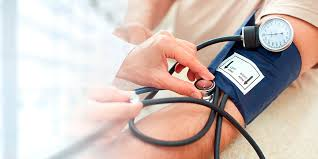

https://huggingface.co/datasets/jadaprojects/Hospital_Mortality_Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1kBYjvHQr0_HdSGZdAlMX-GvNYa3uj17h')

Se eliminan columnas las cuales no son necesarias o estan sesgadas, ademas se eliminan los registros con valores nulos

In [ ]:
data = data.dropna()
data = data.drop("group", axis=1)
data = data.drop("ID", axis=1)
data = data.drop("EF", axis=1)
data = data.drop("outcome", axis=1)
data = data.drop("COPD", axis=1)
data.columns

Index(['age', 'gendera', 'BMI', 'hypertensive', 'atrialfibrillation',
       'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
       'Hyperlipemia', 'Renal failure', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2'],
      dtype='object')

# matriz de correlacion

<Axes: >

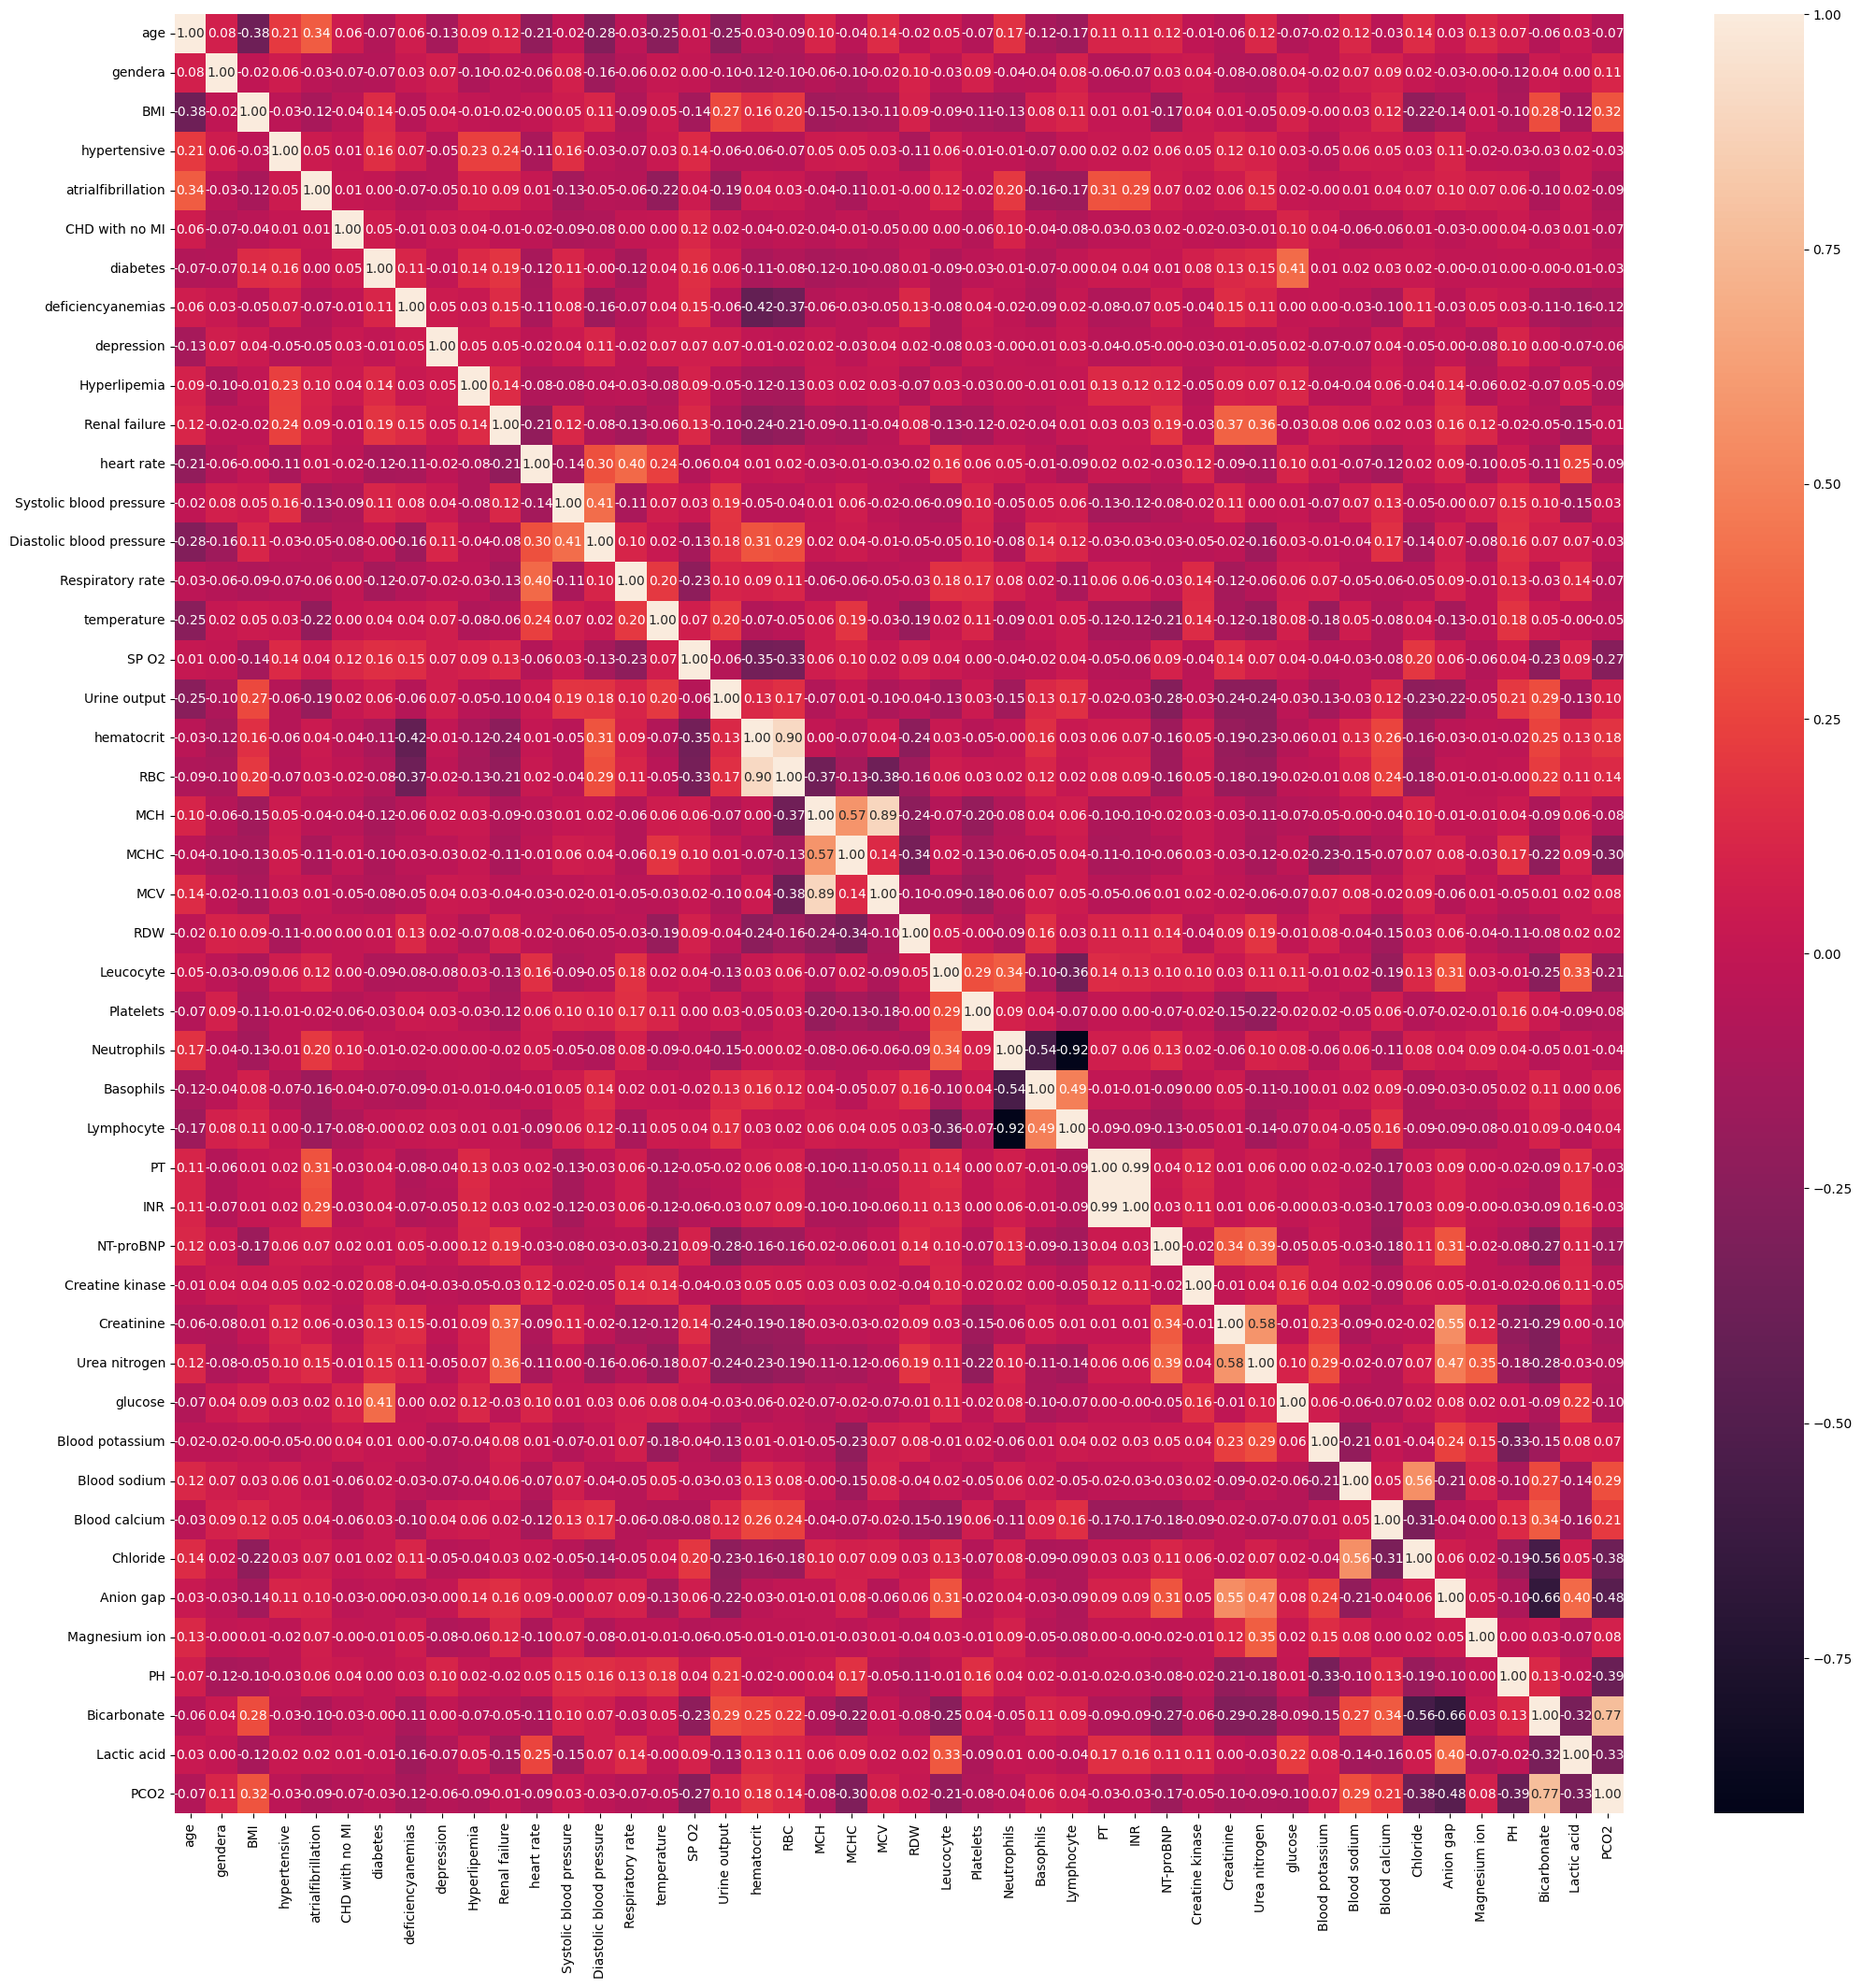

In [ ]:
plt.subplots(figsize=(25,25))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

# Histogramas

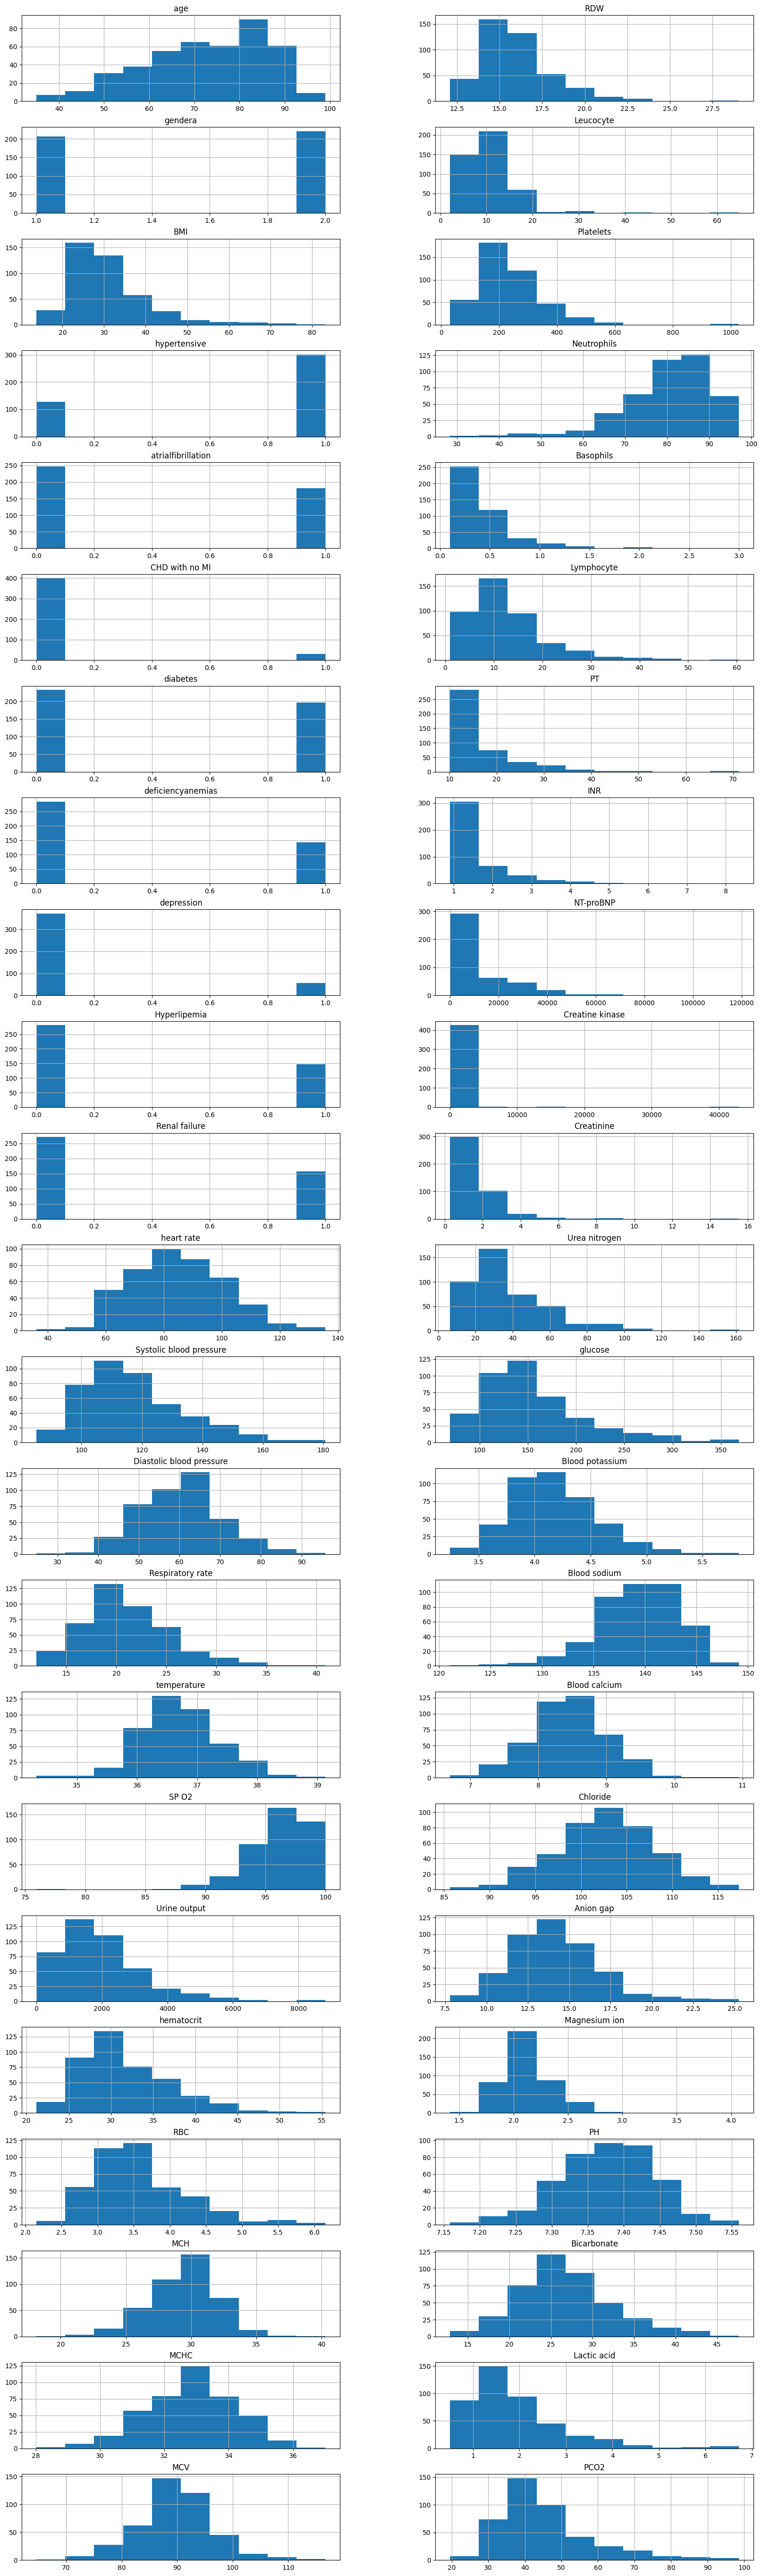

In [ ]:
num_columns = data.shape[1]

fig, axes = plt.subplots(23, 2, figsize=(20, 70))

x = 0
y = 0
for i, col in enumerate(data.columns):
  if i < num_columns/2:
    y = 0
    x = i
  else:
    y = 1
    x = int(i - num_columns/2)
  ax = axes[x,y]
  data.hist(ax=ax, column=col)


#ENTREGA 2

Les recuerdo los requisitos para la primera entrega de proyectos finales, que se llevará a cabo este jueves 21 de noviembre:

1. Deben utilizar TODOS los estimadores vistos en clase: DecisionTree, RandomForest, SupportVectorMachine, con PARÁMETROS POR DEFECTO.
Utilícelos según su tarea:
   - regresión (DecisionTreeRegressor, RandomForestRegressor, SVR)
   - clasificación (DecisionTreeClassifier, RandomForestClassifier, SVC)

2. Elija:
a) usando train_test_split:
Ejecute el siguiente tuning de parámetros (learning curves - notebook 10, "https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/blob/master/10_std_Notes_Regression.ipynb"):
   - DecisionTree (max_depth, criterion)
   - RandomForest (n_estimators, criterion)
   - SVC/R (kernel, gamma)

...ó b) cross_val_score:
Ejecute el siguiente tuning de parámetros (learning curves - notebook 10, "https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/blob/master/10_std_Notes_Regression.ipynb") para determinar el MEJOR número de folds para cada estimador, con parámetros por defecto:
   - DecisionTree
   - RandomForest
   - SVC/R

Al ejecutar las tareas a) ó b) usted obtiene un valor de 4.0 en ESE PUNTO.
Sin embargo...
c) Si desea la nota más alta posible (5.0) en ESE PUNTO, lleve a cabo las tareas (a) y (b).

3. Grafique los resultados de cada ejecución del ítem 2, con matplotlib, usando el gráfico adecuado (plot, bar, etc).

*Si tiene problemas con la ejecución de alguna de las tareas (colapsa colaboratory o algo similar), debe mostrarme la celda de código en donde ocurre el error, como evidencia.

*Cada sustentación durará máximo 10 minutos.

Cualquier inquietud quedo pendiente.

Saludos,


# Punto 1

## sparing data for train and test

In [ ]:
X = data.drop('hypertensive', axis=1).values
y = data['hypertensive'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

##Desition Tree Classifier

In [ ]:
est = DecisionTreeClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.5465116279069767


##Random Forest Classifier


In [ ]:
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.7558139534883721


## Support Vector Machine

In [ ]:
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.7790697674418605


# Puntos 2.a y 3a
# train_test_split

##Desition Tree Classifier (with params)

In [ ]:
#criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
est = DecisionTreeClassifier(max_depth=2, criterion="entropy")
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.7906976744186046


##Random Forest Classifier (with params)

In [ ]:
#criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
est = RandomForestClassifier(n_estimators=85, criterion="entropy")
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.7906976744186046


##Support Vector Machine (with params)

In [ ]:
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# gamma{‘scale’, ‘auto’} or float, default=’scale’
est = SVC(kernel="poly", gamma="auto")
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

## Performance of desition tree varing max_depth

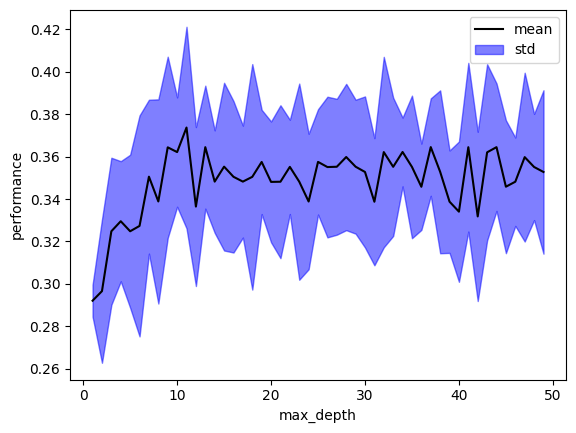

In [ ]:
means, stds = [], []

n_depths_range = range(1,50)
for depth in n_depths_range:
  est = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
  s = cross_val_score(est, X, y, cv=None, scoring=make_scorer(mean_squared_error))
  means.append(np.mean(s))
  stds.append(np.std(s))

means = np.r_[means]
stds  = np.r_[stds]

plt.plot(n_depths_range, means, label="mean", color="black")
plt.fill_between(n_depths_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
plt.xlabel("max_depth")
plt.ylabel("performance")
plt.legend()

## Performance of ramdom forest varing n_stimators

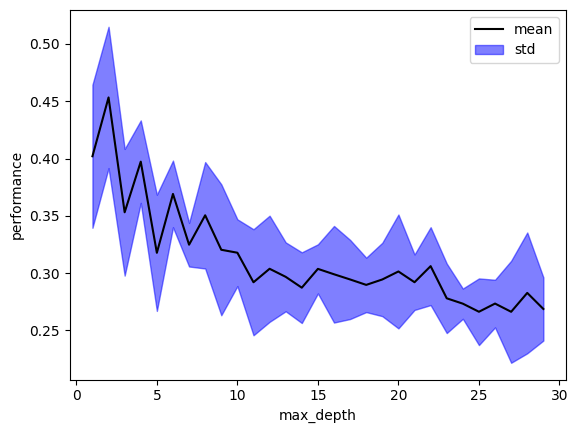

In [ ]:
means, stds = [], []

n_estimators_range = range(1,30)
for n_estimators in n_estimators_range:
  est = RandomForestClassifier(n_estimators=n_estimators, criterion="entropy")
  s = cross_val_score(est, X, y, cv=None, scoring=make_scorer(mean_squared_error))
  means.append(np.mean(s))
  stds.append(np.std(s))

means = np.r_[means]
stds  = np.r_[stds]

plt.plot(n_estimators_range, means, label="mean", color="black")
plt.fill_between(n_estimators_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
plt.xlabel("max_depth")
plt.ylabel("performance")
plt.legend()

## Performance of support vector machine varing kernel param

In [ ]:
means, stds = [], []

svg_kernels = ["poly", "rbf", "sigmoid", "precomputed", "linear"]
for kernel in svg_kernels:
  print(kernel)
  est = SVC(kernel=kernel, gamma="auto")
  s = cross_val_score(est, X, y, cv=None, scoring=make_scorer(mean_squared_error))
  means.append(np.mean(s))
  stds.append(np.std(s))

means = np.r_[means]
stds  = np.r_[stds]

plt.plot(svg_kernels, means, label="mean", color="black")
plt.fill_between(svg_kernels, means-stds, means+stds, color="blue", alpha=.5, label="std")
plt.xlabel("max_depth")
plt.ylabel("performance")
plt.legend()

poly


# Puntos 2.b y 3b
# cross_val_score

# Definir rango

In [ ]:
folds_range = range(2,10)

# Modelos

In [ ]:
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVC": SVC()
}

results = {}

for model_name, model in models.items():
    print(f"Evaluando: {model_name}")
    model_scores = []
    for n_folds in folds_range:
        kf = KFold(n_splits=n_folds, shuffle=True, random_state=21)
        scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        mean_score = np.mean(scores)
        model_scores.append(mean_score)
        print(f"Folds: {n_folds}, Accuracy: {mean_score:.4f}")
    results[model_name] = model_scores

Evaluando: DecisionTree
Folds: 2, Accuracy: 0.6005
Folds: 3, Accuracy: 0.5982
Folds: 4, Accuracy: 0.6075
Folds: 5, Accuracy: 0.6240
Folds: 6, Accuracy: 0.6263
Folds: 7, Accuracy: 0.6378
Folds: 8, Accuracy: 0.6029
Folds: 9, Accuracy: 0.6565
Evaluando: RandomForest
Folds: 2, Accuracy: 0.7033
Folds: 3, Accuracy: 0.6870
Folds: 4, Accuracy: 0.7220
Folds: 5, Accuracy: 0.7103
Folds: 6, Accuracy: 0.7148
Folds: 7, Accuracy: 0.7102
Folds: 8, Accuracy: 0.7219
Folds: 9, Accuracy: 0.7218
Evaluando: SVC
Folds: 2, Accuracy: 0.7033
Folds: 3, Accuracy: 0.7033
Folds: 4, Accuracy: 0.7033
Folds: 5, Accuracy: 0.7032
Folds: 6, Accuracy: 0.7031
Folds: 7, Accuracy: 0.7033
Folds: 8, Accuracy: 0.7029
Folds: 9, Accuracy: 0.7029


# Resultados

In [ ]:
# Determinar el mejor número de folds para cada modelo
for model_name in results:
    best_idx = np.argmax(results[model_name])
    best_folds = folds_range[best_idx]
    best_score = results[model_name][best_idx]
    print(f"Mejor número de folds para {model_name}: {best_folds} con accuracy: {best_score:.4f}")


Mejor número de folds para DecisionTree: 9 con accuracy: 0.6565
Mejor número de folds para RandomForest: 4 con accuracy: 0.7220
Mejor número de folds para SVC: 3 con accuracy: 0.7033


# Grafica DecisionTree

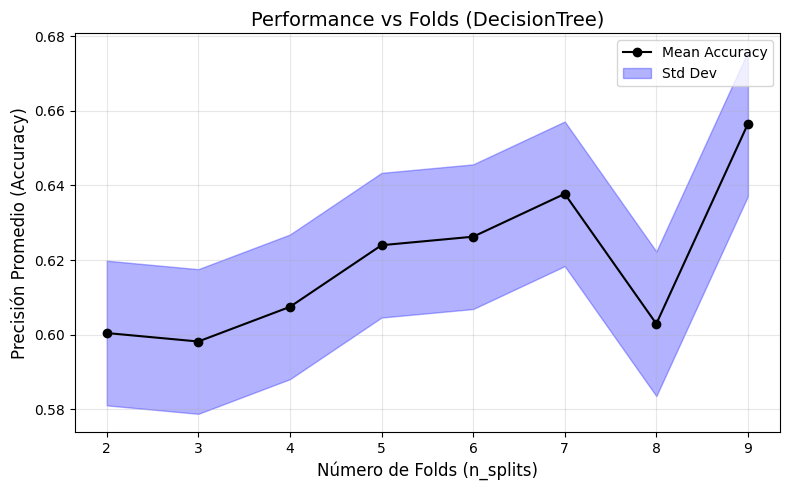

In [ ]:
means = np.array(results["DecisionTree"])  # Promedios
stds = np.std(means)

plt.figure(figsize=(8, 5))
plt.plot(folds_range, means, label="Mean Accuracy", color="black", marker="o")
plt.fill_between(folds_range, means - stds, means + stds, color="blue", alpha=0.3, label="Std Dev")
plt.title("Performance vs Folds (DecisionTree)", fontsize=14)
plt.xlabel("Número de Folds (n_splits)", fontsize=12)
plt.ylabel("Precisión Promedio (Accuracy)", fontsize=12)
plt.xticks(folds_range)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# Grafica RandomForest

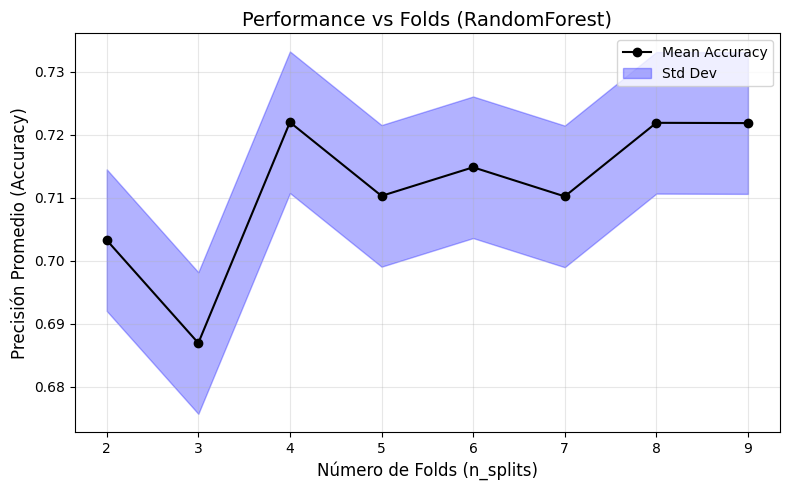

In [ ]:
means = np.array(results["RandomForest"])
stds = np.std(means)

plt.figure(figsize=(8, 5))
plt.plot(folds_range, means, label="Mean Accuracy", color="black", marker="o")
plt.fill_between(folds_range, means - stds, means + stds, color="blue", alpha=0.3, label="Std Dev")
plt.title("Performance vs Folds (RandomForest)", fontsize=14)
plt.xlabel("Número de Folds (n_splits)", fontsize=12)
plt.ylabel("Precisión Promedio (Accuracy)", fontsize=12)
plt.xticks(folds_range)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# Grafica para SVC

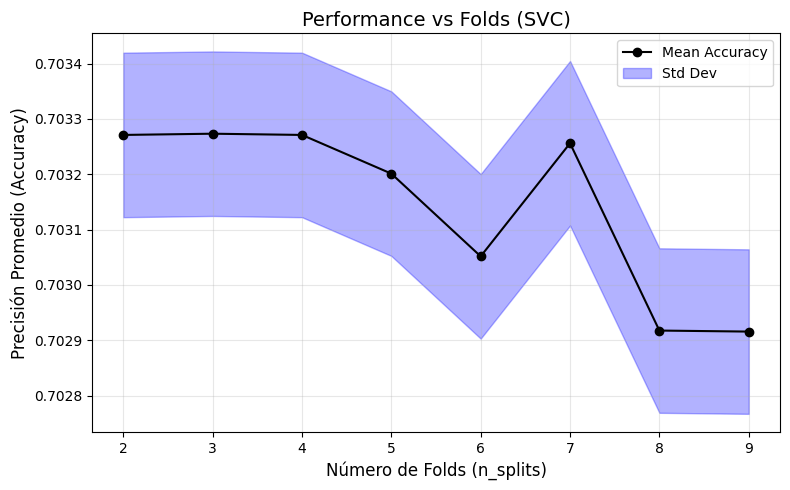

In [ ]:
means = np.array(results["SVC"])
stds = np.std(means)

plt.figure(figsize=(8, 5))
plt.plot(folds_range, means, label="Mean Accuracy", color="black", marker="o")
plt.fill_between(folds_range, means - stds, means + stds, color="blue", alpha=0.3, label="Std Dev")
plt.title("Performance vs Folds (SVC)", fontsize=14)
plt.xlabel("Número de Folds (n_splits)", fontsize=12)
plt.ylabel("Precisión Promedio (Accuracy)", fontsize=12)
plt.xticks(folds_range)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


3. Sustentación de proyectos finales:
Requisitos de la entrega:
- PARTE I: al notebook que ya tienen elaborado, agregarle la implementación de un perceptrón multicapa (TAL COMO SE VIÓ EN LOS NOTEBOOKS 11 y 12) con: 3 capas ocultas, 6 capas ocultas y 10 capas ocultas. Calcular el accuracy_score ó el mean_absolute_error (según su tarea) para cada uno de esos 3 casos.
- PARTE II: tener en cuenta las indicaciones de la sección "Proyecto funcional IA" del repositorio (https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/). Esta sección es OBLIGATORIA y debe enviarse al CORREO de su profesor EL DÍA ANTERIOR A LA SUSTENTACIÓN (miércoles 11 de diciembre).
*Fecha: jueves 12 de diciembre, en sus horarios de clase.

# Entrega 3



##1 perceptron multicapa con 3 capas ocultas

In [ ]:
unique_values = len(data["hypertensive"].unique())

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=X_train[0].shape),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(unique_values, activation=tf.nn.softmax)
  ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, verbose=1)
y_pred_prob= model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5484 - loss: 430.1691
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5854 - loss: 75.9007
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4874 - loss: 74.1802
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6294 - loss: 41.3737
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5205 - loss: 37.8401
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5994 - loss: 128.1199
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6435 - loss: 41.7084
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6553 - loss: 21.7904
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6357 - loss: 45.6737
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6254 - loss: 32.3998
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5458 - loss: 27.9136
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - 

## 2 Perceptrón multicapa con 6 capas ocultas

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=X_train[0].shape),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(unique_values, activation=tf.nn.softmax)
  ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, verbose=1)
y_pred_prob= model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5521 - loss: 137.9373
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5954 - loss: 33.9054
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6039 - loss: 6.6990
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6626 - loss: 14.7426
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5688 - loss: 15.4693
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6211 - loss: 5.5185
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5096 - loss: 2.8636
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6023 - loss: 6.5898
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5720 - loss: 4.2031
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5683 - loss: 2.0985
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6613 - loss: 2.7746
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accurac

## 3 perceptrón multicapa con 9 capas ocultas

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=X_train[0].shape),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(unique_values, activation=tf.nn.softmax)
  ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, verbose=1)
y_pred_prob= model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5184 - loss: 37.1586
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6054 - loss: 5.5257
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6342 - loss: 3.4736
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6394 - loss: 1.7557
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5345 - loss: 1.0002
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6542 - loss: 0.8562
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6875 - loss: 0.6441
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6682 - loss: 1.0565
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6179 - loss: 0.7965
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6924 - loss: 0.6542
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7093 - loss: 0.6401
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy